In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 11.5 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.0 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import re

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
news_df = pd.read_csv('./Data/news.csv')
news_df.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without.",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding you back and keeping you from shedding that unwanted belly fat for good.,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [20], ""SurfaceForms"": [""Belly Fat""]}]","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [97], ""SurfaceForms"": [""belly fat""]}]"
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches of Ukraine's War,"Lt. Ivan Molchanets peeked over a parapet of sand bags at the front line of the war in Ukraine. Next to him was an empty helmet propped up to trick snipers, already perforated with multiple holes.",https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId"": ""Q212"", ""Confidence"": 0.946, ""OccurrenceOffsets"": [87], ""SurfaceForms"": [""Ukraine""]}]"
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My Mental Health.,"I felt like I was a fraud, and being an NBA wife didn't help that. In fact, it nearly destroyed me.",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ""Type"": ""O"", ""WikidataId"": ""Q155223"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [40], ""SurfaceForms"": [""NBA""]}]"
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a Dermatologist","They seem harmless, but there's a very good reason you shouldn't ignore them. The post How to Get Rid of Skin Tags, According to a Dermatologist appeared first on Reader's Digest.",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [18], ""SurfaceForms"": [""Skin Tags""]}]","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [105], ""SurfaceForms"": [""Skin Tags""]}, {""Label"": ""Dermatology"", ""Type"": ""C"", ""WikidataId"": ""Q171171"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [131], ""SurfaceForms"": [""Dermatologist""]}, {""Label"": ""Reader's Digest"", ""Type"": ""M"", ""WikidataId"": ""Q371820"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [163], ""SurfaceForms"": [""Reader's Digest""]}]"


In [4]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   news_id            51282 non-null  object
 1   category           51282 non-null  object
 2   subcategory        51282 non-null  object
 3   title              51282 non-null  object
 4   abstract           48616 non-null  object
 5   url                51282 non-null  object
 6   title_entities     51279 non-null  object
 7   abstract_entities  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [5]:
news_df.isnull().sum()  

news_id                 0
category                0
subcategory             0
title                   0
abstract             2666
url                     0
title_entities          3
abstract_entities       4
dtype: int64

In [6]:
news_df.shape

(51282, 8)

In [7]:
news_df.dropna(axis=0, inplace=True)    
news_df.shape

(48612, 8)

In [8]:
news_df['abstract'].head(20)

0                                                                                                                                                                                                                                                                                                                                                                                              Shop the notebooks, jackets, and more that the royals can't live without.
1                                                                                                                                                                                                                                                                                                                                                   These seemingly harmless habits are holding you back and keeping you from shedding that unwanted belly fat for good.
2                                                                                     

In [9]:
news_df['abstract_length']=news_df['abstract'].apply(lambda x: len(x) )
news_df['title_length']=news_df['title'].apply(lambda x: len(x)) 

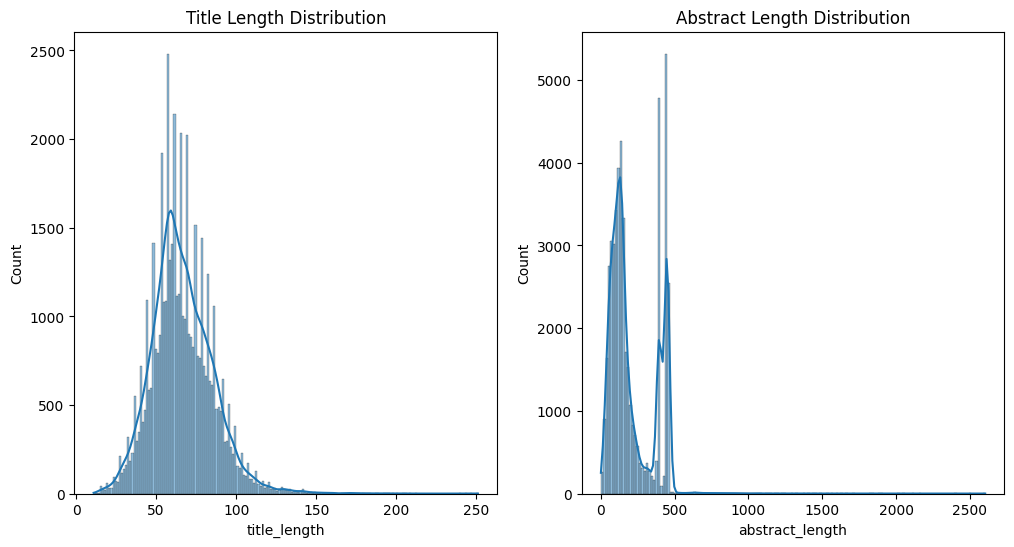

In [10]:
# 제목, 내용 길이 분포 확인

plt.figure(figsize=(12,6))  
plt.subplot(1,2,1)
sns.histplot(news_df['title_length'], kde=True)
plt.title('Title Length Distribution')
plt.subplot(1,2,2)
sns.histplot(news_df['abstract_length'], kde=True)
plt.title('Abstract Length Distribution')
plt.show()  

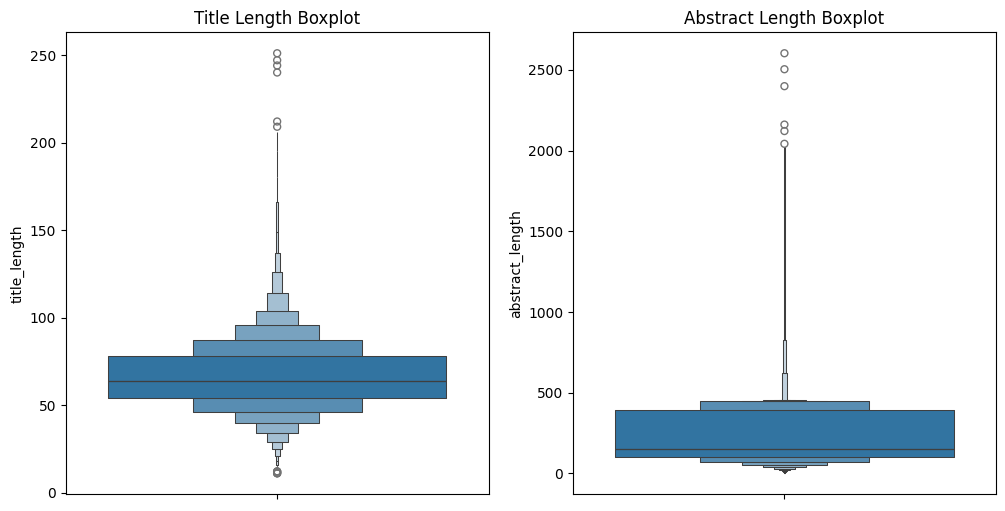

In [11]:
# 박스플롯 


plt.figure(figsize=(12,6))  
plt.subplot(1,2,1)
sns.boxenplot(news_df['title_length'])
plt.title('Title Length Boxplot')
plt.subplot(1,2,2)
sns.boxenplot(news_df['abstract_length'])
plt.title('Abstract Length Boxplot')
plt.show()  

In [30]:
news_df[['title_length','abstract_length']].describe()    

,title_length,abstract_length
count,48612.000000,48612.000000
mean,66.359335,216.078664
std,19.220514,154.463866
min,11.000000,1.000000
25%,54.000000,100.000000
50%,64.000000,149.000000
75%,78.000000,394.000000
max,251.000000,2603.000000


In [57]:
# 제목 길이가 긴 상위 5개의 뉴스 확인
news_df.sort_values(by='title_length', ascending=False)['title'].head(5)

23218    Russian spy Maria Butina, 30, will be released from jail on Friday and escorted by two ICE agents back to Moscow after serving 16 months of her 18-month sentence as her life behind bars of five-mile runs and working at the prison cafeteria is revealed
1683         And the bride wore sparkles! First look at Jennifer Lawrence and Cooke Maroney as a married couple as they leave their haunted Rhode Island castle wedding venue after partying with A-list guests including Sienna Miller and Kris Jenner until 5.30am
29790           EXCLUSIVE: Given up for adoption at two, a grueling Soviet childhood and a violent marriage: The true story of the homeless 'voice of an angel' is revealed as friends and family rejoice over finding the prodigy they feared they had lost forever
2044                'If I had never dialed the police, she'd still be alive': Neighbor who called a non-emergency number to ask for a 2am welfare check on a woman, 28, because her front door was open says he is horrif

In [59]:
len('Russian spy Maria Butina, 30, will be released from jail on Friday and escorted by two ICE agents back to Moscow after serving 16 months of her 18-month sentence as her life behind bars of five-mile runs and working at the prison cafeteria is revealed')

251

In [12]:

Q1 = news_df['abstract_length'].quantile(0.25)
Q3 = news_df['abstract_length'].quantile(0.75)
IQR = Q3 - Q1

max_threshold = int(Q3 + 1.5 * IQR)
max_threshold


835

In [14]:
# 최대 길이 설정 (IQR 기반 이상치 제거)
MAX_ABSTRACT_LENGTH = max_threshold  # 841자로 설정

news_df['trimmed_abstract'] = news_df['abstract'].apply(lambda x: x[:MAX_ABSTRACT_LENGTH])




## 데이터 정제

In [31]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/mac/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# 영어, 소문자로 통일, 불용어 제거, 숫자 제거(x), 특수문자 제거, 마지막에 내용이 줄임표시 되어있는 것들이 있음(...)
stop_words=set(stopwords.words('english'))  


def clean_text(text):
    text=text.lower()
    #text=re.sub(r'\d+','',text)
    text=re.sub(r'[^\w\s]','',text) # 특수문자 제거
    text=re.sub(r'\s+',' ',text) # 연속된 공백 하나의 공백으로
    tokens=word_tokenize(text)
    for token in tokens:
        if token in stop_words:
            tokens.remove(token)    
    text=' '.join(tokens)   
    
    return text
    

In [30]:
news_df['cleaned_abstract']=news_df['trimmed_abstract'].apply(lambda x: clean_text(x))  
news_df[['cleaned_abstract','trimmed_abstract']].head(10)

,cleaned_abstract,trimmed_abstract
0,shop notebooks jackets more the royals cant live without,"Shop the notebooks, jackets, and more that the royals can't live without."
1,seemingly harmless habits holding back keeping from shedding unwanted belly fat good,These seemingly harmless habits are holding you back and keeping you from shedding that unwanted belly fat for good.
2,lt ivan molchanets peeked a parapet sand bags the front line the war ukraine next him an empty helmet propped to trick snipers already perforated multiple holes,"Lt. Ivan Molchanets peeked over a parapet of sand bags at the front line of the war in Ukraine. Next to him was an empty helmet propped up to trick snipers, already perforated with multiple holes."
3,felt like was fraud being nba wife didnt help in fact nearly destroyed,"I felt like I was a fraud, and being an NBA wife didn't help that. In fact, it nearly destroyed me."
4,seem harmless theres very good reason shouldnt ignore the post get rid skin tags according to a dermatologist appeared first readers digest,"They seem harmless, but there's a very good reason you shouldn't ignore them. The post How to Get Rid of Skin Tags, According to a Dermatologist appeared first on Reader's Digest."
5,several fines came against nfl players criticizing officiating week a bad look the league,Several fines came down against NFL players for criticizing officiating this week. It's a very bad look for the league.
6,wont a chill to bones halloween orlando unless count sweat dripping your armpits,"There won't be a chill down to your bones this Halloween in Orlando, unless you count the sweat dripping from your armpits."
7,three people died a supermarket fire angry protests chile entered seventh day mayor capital city santiago said sunday,"Three people have died in a supermarket fire as angry protests in Chile entered their seventh day, the mayor of capital city Santiago said on Sunday."
8,every confirmed expected ps5 game cant wait play,Every confirmed or expected PS5 game we can't wait to play
9,there active closings view here wxii 12 news receives number phone calls emails viewers questions sign for newsletters report closure please visit wxiireportclosingcom weather closing system a vieweroperated system employees wxiitv wxii12com not enter information the system comes straight the schoolbusinessinstitution you enter information,"When there are active closings, view them here. WXII 12 News receives a number of phone calls and e-mails from viewers with questions. Sign up for our Newsletters To report a closure, please visit wxii.reportclosing.com The weather closing system is a viewer-operated system. Employees of WXII-TV and WXII12.com DO NOT enter the information in the system. That comes straight from the school/business/institution. Before you can enter information,..."


## CountVectorizer 이용해서 벡터화

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity



countvetor=CountVectorizer(max_features=1000)
count_matrix=countvetor.fit_transform(news_df['cleaned_abstract']) 

count_matrix

<48612x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 575712 stored elements in Compressed Sparse Row format>

In [32]:
count_matrix.shape

(48612, 1000)

In [33]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
count_sim = cosine_similarity(count_matrix)


In [35]:
count_sim.shape

(48612, 48612)

In [36]:
def get_countvector_recommendations(news_id, news_df, sim_matrix, top_n=5):
    # 해당 뉴스 ID의 인덱스 찾기
    idx = news_df[news_df['news_id'] == news_id].index[0]
    
    # 해당 뉴스와 모든 뉴스 간 유사도 가져오기
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # 유사도가 높은 순으로 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 가장 유사한 상위 N개 뉴스 ID 반환 (자기 자신 제외)
    top_news = [news_df.iloc[i[0]]['news_id'] for i in sim_scores[1:top_n+1]]
    return top_news


In [37]:
# 특정 뉴스 ID (예: 첫 번째 뉴스)
news_id_example = news_df['news_id'][0]

# CountVectorizer 추천 뉴스 출력
count_recommendations = get_countvector_recommendations(news_id_example, news_df, count_sim)

print(f"뉴스 {news_id_example}와 유사한 뉴스 추천 (CountVectorizer): {count_recommendations}")


뉴스 N55528와 유사한 뉴스 추천 (CountVectorizer): ['N52473', 'N56093', 'N39996', 'N37815', 'N63801']


In [38]:
news_df.columns

Index(['news_id', 'category', 'subcategory', 'title', 'abstract', 'url',
       'title_entities', 'abstract_entities', 'abstract_length',
       'title_length', 'trimmed_abstract', 'cleaned_abstract'],
      dtype='object')

In [39]:
news_df['news_id'][0]

'N55528'

In [40]:
news_df[news_df['news_id']==news_id_example][['news_id','category', 'subcategory', 'title', 'abstract']]

,news_id,category,subcategory,title,abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without."


In [41]:
# 라이프 스타일, 왕실 관련 라이프, "엘리자베스 여왕, 찰스 왕세자, 필립 공이 애용하는 브랜드"
# 노트북과 재킷을 쇼핑했다는 내용

In [43]:
# 추천 뉴스 정보 

news_df[news_df['news_id'].isin(count_recommendations)][['news_id','category', 'subcategory', 'title', 'abstract']]       

,news_id,category,subcategory,title,abstract
1796,N37815,tv,tvvideos,"The ""Saved by the Bell"" reboot will seemingly happen without Kelly Kapowski and Zack Morris, and this is sad","The Saved by the Bell reboot will seemingly happen without Kelly Kapowski and Zack Morris, and this is sad NBCU decided to reboot Saved by the Belland forgot to tell Tiffani Thiessen."
7039,N52473,lifestyle,lifestyledidyouknow,9 American products that seem bizarre to people from other countries,"From spray cheese to garbage disposals, here are 9 things that Americans can't live without but the rest of the world certainly can."
13019,N63801,sports,basketball_nba,Kawhi Leonard's Clippers debut leaves NBA fans wanting more,"Kawhi Leonard made his preseason debut with the Los Angeles Clippers on Thursday night, and the team can't wait for more."
16949,N39996,sports,basketball_nba,10 bold predictions for the 2019-20 NBA season,Will the Warriors flounder without Kevin Durant? Who can challenge Zion Williamson for Rookie of the Year? Check out the predictions on those and more here.
27852,N56093,foodanddrink,cooking,"An Instant Pot with a sous vide function (yes, really!) is more than 50% off",And more from the Sur La Table warehouse sale.


In [75]:
#문제점

# 라이프스타일(lifestyle) 기사인데, 스포츠/건강 카테고리 기사 추천됨
# 왕실 관련 기사인데, 자동차·건강 기사 추천됨
# 카테고리 필터링을 추가하지 않음 → 무작위 추천 경향

## TF-IDF 벡터화

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(news_df['cleaned_abstract'])

In [45]:
tfidf_sim = cosine_similarity(tfidf_matrix)

tfidf_sim.shape

(48612, 48612)

In [70]:
def get_tfidf_recommendations(news_id, news_df, sim_matrix, top_n=5):
    #  해당 뉴스 ID의 인덱스 찾기
    idx = news_df[news_df['news_id'] == news_id].index[0]
    
    # 해당 뉴스와 모든 뉴스 간 유사도 가져오기
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # 유사도가 높은 순으로 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 가장 유사한 상위 N개 뉴스 ID, 제목, 유사도 반환 (자기 자신 제외)
    top_news = [(news_df.iloc[i[0]]['news_id'], news_df.iloc[i[0]]['title'], i[1]) for i in sim_scores[1:top_n+1]]
    return top_news


In [48]:
# 특정 뉴스 ID (예: 첫 번째 뉴스)
news_id_example = news_df['news_id'][0]

# TF-IDF 추천 뉴스 출력
tfidf_recommendations = get_tfidf_recommendations(news_id_example, news_df, tfidf_sim)

print(f"뉴스 {news_id_example}와 유사한 뉴스 추천 (TF-IDF): {tfidf_recommendations}")


뉴스 N55528와 유사한 뉴스 추천 (TF-IDF): ['N52473', 'N46032', 'N48066', 'N27039', 'N39360']


In [49]:
news_df[news_df['news_id']==news_id_example][['news_id','category', 'subcategory', 'title', 'abstract']]    

,news_id,category,subcategory,title,abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without."


In [50]:
news_df[news_df['news_id'].isin(tfidf_recommendations)][['news_id','category', 'subcategory', 'title', 'abstract']]       

,news_id,category,subcategory,title,abstract
3570,N48066,foodanddrink,restaurantsandnews,"Is Mobile, Alabama, Hiding the Country's Best Chicken Fingers?",You can't fake the Foo.
4706,N27039,health,causes,Don't Ignore These Silent Signs of Diabetes,"From a lagging libido to irritability, you can't afford to ignore these diabetes symptoms."
7039,N52473,lifestyle,lifestyledidyouknow,9 American products that seem bizarre to people from other countries,"From spray cheese to garbage disposals, here are 9 things that Americans can't live without but the rest of the world certainly can."
31315,N46032,foodanddrink,tipsandtricks,40 Next-Level Cooking Hacks You Never Knew You Could Do,The smart cooking tips and tricks you can't believe you've lived without.
43041,N39360,movies,movienews,Kristen Stewart 'Can't Wait' to Hear Robert Pattinson's Batman Voice: 'I Have All the Faith',Kristen Stewart 'Can't Wait' for Robert Pattinson's Batman Voice


In [ ]:
# 파라미터 조정

tfidf_vectorizer = TfidfVectorizer(

    max_features=5000,   # 단어 수를 늘려서 더 많은 정보를 반영
    min_df=2,            # 너무 희귀한 단어 제외
    max_df=0.8    
                  # 너무 흔한 단어 제외
)

tfidf_matrix_parameter = tfidf_vectorizer.fit_transform(news_df['cleaned_abstract'])


In [61]:
tfidf_sim_parameter = cosine_similarity(tfidf_matrix_parameter) 

In [62]:
tfidf_recommendations = get_tfidf_recommendations(news_id_example, news_df,  tfidf_sim_parameter)

print(f"뉴스 {news_id_example}와 유사한 뉴스 추천 (TF-IDF): {tfidf_recommendations}")



뉴스 N55528와 유사한 뉴스 추천 (TF-IDF): ['N30132', 'N23273', 'N61541', 'N843', 'N61200']


In [66]:
news_df[news_df['news_id']==news_id_example][['news_id','category', 'subcategory', 'title', 'abstract']]    

,news_id,category,subcategory,title,abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without."


In [65]:
news_df[news_df['news_id'].isin(tfidf_recommendations)][['news_id','category', 'subcategory', 'title', 'abstract']]       

,news_id,category,subcategory,title,abstract
4058,N61541,lifestyle,lifestyleroyals,All the hats Duchesses Kate and Meghan have worn in 2019,"See the royals' most fashionable hats, fascinators, headbands, headscarves and tiaras of the year!"
5052,N23273,lifestyle,lifestyleroyals,Best Looks: Queen Maxima of the Netherlands,We're so very fortunate to live in a world filled with fashionable royals.
5776,N61200,finance,finance-insurance,Medicare Open Enrollment Starts Today. Here's What's New,It pays to shop around.
34736,N843,sports,baseball_mlb,Shaun's 2019 SB Nation off-season simulation results,"In which, Shaun ruins the Indians to help out the Royals"
39947,N30132,sports,baseball_mlb,"Royals Rumblings - News for November 12, 2019",Will the Royals be running under Matheny?


In [ ]:
# max_features=5000, min_df=2, max_df=0.8  

tfidf_recommendations_with_sim = get_tfidf_recommendations(news_id_example, news_df,  tfidf_sim_parameter)


recommended_news_ids = [item[0] for item in tfidf_recommendations_with_sim]
recommended_titles = [item[1] for item in tfidf_recommendations_with_sim]
similarities = [item[2] for item in tfidf_recommendations_with_sim]


input_news = news_df[news_df['news_id'] == news_id_example][['news_id', 'category', 'subcategory', 'title', 'abstract']]

recommended_news = news_df[news_df['news_id'].isin(recommended_news_ids)][['news_id', 'category', 'subcategory', 'title', 'abstract']]
recommended_news['similarity'] = similarities  # 유사도 추가

recommended_news

,news_id,category,subcategory,title,abstract,similarity
4058,N61541,lifestyle,lifestyleroyals,All the hats Duchesses Kate and Meghan have worn in 2019,"See the royals' most fashionable hats, fascinators, headbands, headscarves and tiaras of the year!",0.450501
5052,N23273,lifestyle,lifestyleroyals,Best Looks: Queen Maxima of the Netherlands,We're so very fortunate to live in a world filled with fashionable royals.,0.446954
5776,N61200,finance,finance-insurance,Medicare Open Enrollment Starts Today. Here's What's New,It pays to shop around.,0.432505
34736,N843,sports,baseball_mlb,Shaun's 2019 SB Nation off-season simulation results,"In which, Shaun ruins the Indians to help out the Royals",0.397035
39947,N30132,sports,baseball_mlb,"Royals Rumblings - News for November 12, 2019",Will the Royals be running under Matheny?,0.376958


In [ ]:
# 유사도 0.37 ~ 0.45 사이
# 0.45 에 가까운 유사도를 보인 뉴스가 카테고리도 같은 것을 확인할 수 있음
# 파라미터 조정을 통해 더 정확한 추천 가능해짐
# title 정보를 추가하여 추천해고 유사도 비교하기

In [ ]:
# 다른 기사 ID 
news_id_example = news_df['news_id'][5] 

tfidf_recommendations_with_sim = get_tfidf_recommendations(news_id_example, news_df,  tfidf_sim_parameter)


recommended_news_ids = [item[0] for item in tfidf_recommendations_with_sim]
recommended_titles = [item[1] for item in tfidf_recommendations_with_sim]
similarities = [item[2] for item in tfidf_recommendations_with_sim]

input_news = news_df[news_df['news_id'] == news_id_example][['news_id', 'category', 'subcategory', 'title', 'abstract']]

recommended_news = news_df[news_df['news_id'].isin(recommended_news_ids)][['news_id', 'category', 'subcategory', 'title', 'abstract']]
recommended_news['similarity'] = similarities  

recommended_news


,news_id,category,subcategory,title,abstract,similarity
7862,N846,sports,football_nfl,NFL Week 7 Awards: Is this the best photo ever taken of a NFL player?,"The good, the bad, and the hilarious from Sunday's NFL action.",0.439033
12559,N8921,sports,football_nfl,NFL Week 6 Awards: This baffling call in Cleveland was the worst of the week,"The good, the bad, and the hilarious from Sunday's NFL action.",0.374377
19260,N12200,sports,football_ncaa,Teams with most (and fewest) in-state players,A look at in-state players on rosters.,0.358008
45040,N35590,sports,football_nfl,Drew Sample injury is the cherry on top of Bengals' disastrous 2019 draft class,It bad.,0.315026
47898,N9509,sports,football_nfl,Miami Film Review: First Quarter,It was bad. Very bad.,0.315026


In [81]:
news_df[news_df['news_id']==news_id_example][['news_id','category', 'subcategory', 'title', 'abstract']]

,news_id,category,subcategory,title,abstract
5,N2073,sports,football_nfl,Should NFL be able to fine players for criticizing officiating?,Several fines came down against NFL players for criticizing officiating this week. It's a very bad look for the league.


In [ ]:
# 다른 기사들을 넣어보니 추천이 잘 되지 않고 있는 것을 확인
# 0.4 이상이면 비슷한 뉴스를 추천함


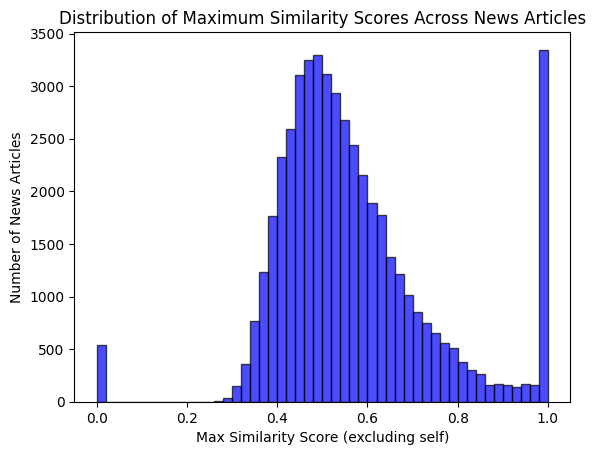

{'Mean Similarity': np.float64(0.5687955854187351),
 'Median Similarity': np.float64(0.5316622171032794),
 'Standard Deviation': np.float64(0.17732210496433515),
 'Min Similarity': np.float64(0.0),
 'Max Similarity': np.float64(1.0000000000000004)}

In [ ]:

def analyze_similarity_distribution(sim_matrix):
    max_similarities = []
    
    for i in range(sim_matrix.shape[0]):
        sorted_similarities = np.sort(sim_matrix[i])  # 유사도 정렬
        max_similarities.append(sorted_similarities[-2])  # 자기 자신 제외 최고 유사도
    
    return np.array(max_similarities)

max_similarities = analyze_similarity_distribution(tfidf_sim)

# 평균
mean_similarity = np.mean(max_similarities)
median_similarity = np.median(max_similarities)
std_similarity = np.std(max_similarities)

plt.hist(max_similarities, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Max Similarity Score (excluding self)")
plt.ylabel("Number of News Articles")
plt.title("Distribution of Maximum Similarity Scores Across News Articles")
plt.show()

{
    "Mean Similarity": mean_similarity,
    "Median Similarity": median_similarity,
    "Standard Deviation": std_similarity,
    "Min Similarity": np.min(max_similarities),
    "Max Similarity": np.max(max_similarities)
}


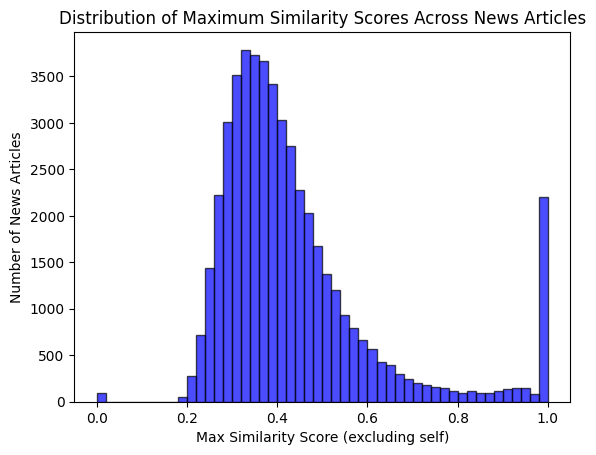

{'Mean Similarity': np.float64(0.4374504529868007),
 'Median Similarity': np.float64(0.3904055023641513),
 'Standard Deviation': np.float64(0.1776270517585469),
 'Min Similarity': np.float64(0.0),
 'Max Similarity': np.float64(1.0000000000000007)}

: 

In [ ]:
# tfidf_sim_parameter


def analyze_similarity_distribution(sim_matrix):
    max_similarities = []
    
    for i in range(sim_matrix.shape[0]):
        max_similarities.append(sorted_similarities[-2])  
    
    return np.array(max_similarities)

max_similarities = analyze_similarity_distribution(tfidf_sim_parameter)

mean_similarity = np.mean(max_similarities)
median_similarity = np.median(max_similarities)
std_similarity = np.std(max_similarities)

plt.hist(max_similarities, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Max Similarity Score (excluding self)")
plt.ylabel("Number of News Articles")
plt.title("Distribution of Maximum Similarity Scores Across News Articles")
plt.show()

{
    "Mean Similarity": mean_similarity,
    "Median Similarity": median_similarity,
    "Standard Deviation": std_similarity,
    "Min Similarity": np.min(max_similarities),
    "Max Similarity": np.max(max_similarities)
}



In [ ]:
#